## Settings

In [1]:
reviews_path = 'C:\\Data\\UCL\\@MSc Project - Data and sources\\reviews.csv'

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

%matplotlib inline

## Load the data

In [3]:
data = pd.read_csv(reviews_path)
data.head()

,id,Company_id,ReviewTitle,Rating,JobTitle,EmployeeRelationship,Contract,Pros,Cons,Year,Month,Day,Company,Sector,ListedOn,Review,ReviewLentgth,Date,Year-Month
0,3947,400,Nice company,5.0,Software Development Engineer,Current Employee,full-time,Good Base salary you can expect herr,Very little stocks compared to faang companies,2020,6,18,Nvidia Corporation,Technology,S&P 500,Good Base salary you can expect herr Very litt...,83,2020-06-18,2020-06-01
1,3948,400,Great benefits,5.0,Senior Software Engineer,Current Employee,full-time,"Great leadership (Jensen Huang, CEO)",Unsure how well that leadership percolates dow...,2020,6,1,Nvidia Corporation,Technology,S&P 500,"Great leadership (Jensen Huang, CEO) Unsure ho...",94,2020-06-01,2020-06-01
2,3949,400,"Great Company, Interesting Work",5.0,Architect,Current Employee,full-time,There are always interesting problems to tackl...,"Sometimes internal tools, flows and infrastruc...",2020,5,28,Nvidia Corporation,Technology,S&P 500,There are always interesting problems to tackl...,377,2020-05-28,2020-05-01
3,3950,400,Experience working in Nvidia,4.0,Senior Software Engineer,Former Employee,full-time,The people around you are very friendly and th...,The procedure of promotion is not clear. It us...,2020,5,28,Nvidia Corporation,Technology,S&P 500,The people around you are very friendly and th...,276,2020-05-28,2020-05-01
4,3951,400,Amazing place to work for mid/late career engi...,5.0,Solutions Architect,Current Employee,full-time,"Endless room to learn, easy to move around, fo...","Must be a self-starter to work here, fast-pace...",2020,5,27,Nvidia Corporation,Technology,S&P 500,"Endless room to learn, easy to move around, fo...",353,2020-05-27,2020-05-01


In [11]:
min_date = datetime.strptime('2018-7-1', '%Y-%m-%d')
max_date = datetime.strptime('2020-6-30', '%Y-%m-%d')
data['Date'] = pd.to_datetime(data.Date)

data = data[(data.Date >= min_date) & (data.Date <= max_date)]

## **==FUNCTIONS==**

## Analysis for S&P 500

In [24]:
data_sp = pd.DataFrame(
    pd.DataFrame(
        data[data.ListedOn == 'S&P 500']
        .groupby(['Sector', 'Year-Month'])
        .Rating
        .mean()
    ).to_records()
)

data_sp_pivot = pd.pivot_table(
    data=data_sp,
    values='Rating',
    columns='Sector',
    index='Year-Month'
)

### *Absolute*

In [26]:
sp_corr = data_sp_pivot.corr()

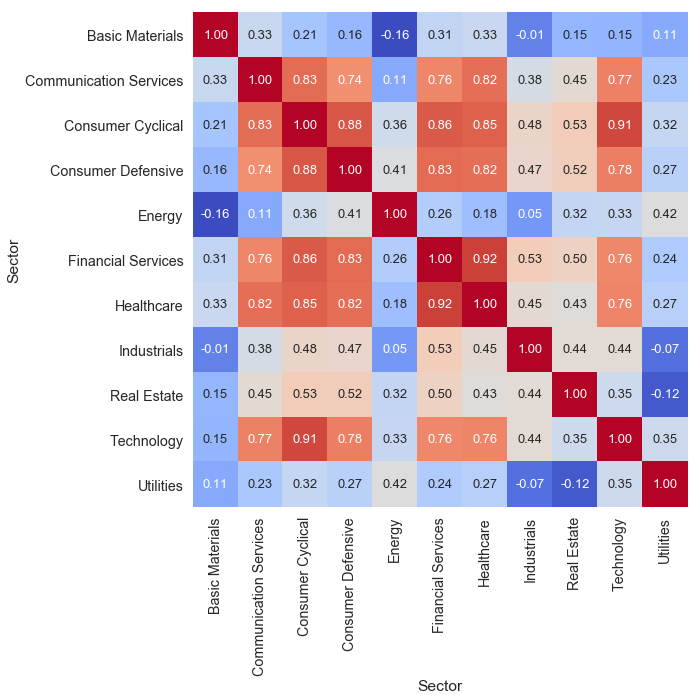

In [30]:
plt.figure(figsize=(10,10))

sns.heatmap(
    sp_corr,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 13},
    cbar=False,
    cmap='coolwarm',
    square=True
)

plt.tight_layout()
#plt.savefig('C:\\Data\\UCL\\@MSc Project - Data and sources\\Images\\corr_1.png')

### *Changes*

In [41]:
data_sp_changes = data_sp_pivot.rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])

In [45]:
sp_changes_corr = data_sp_changes.corr()

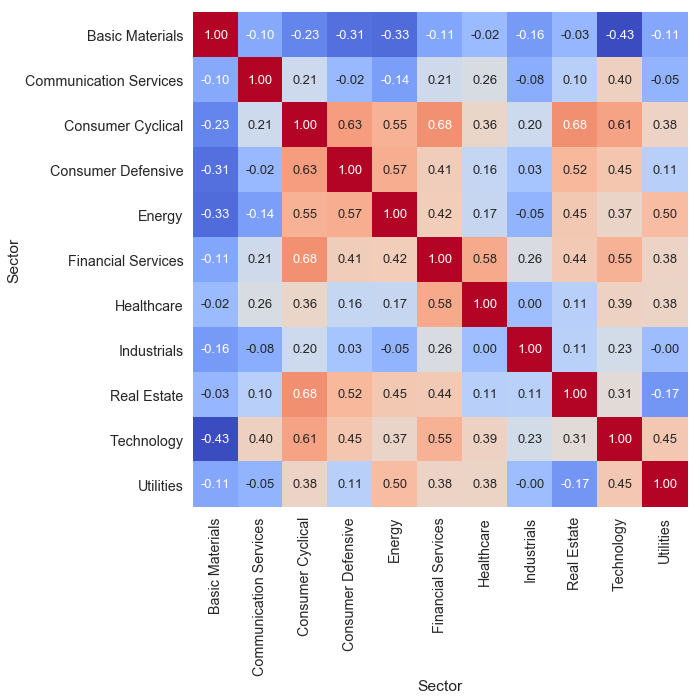

In [47]:
plt.figure(figsize=(10,10))

sns.heatmap(
    sp_changes_corr,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 13},
    cbar=False,
    cmap='coolwarm',
    square=True
)

plt.tight_layout()
#plt.savefig('C:\\Data\\UCL\\@MSc Project - Data and sources\\Images\\corr_1.png')